# Question 1

## Part (a)

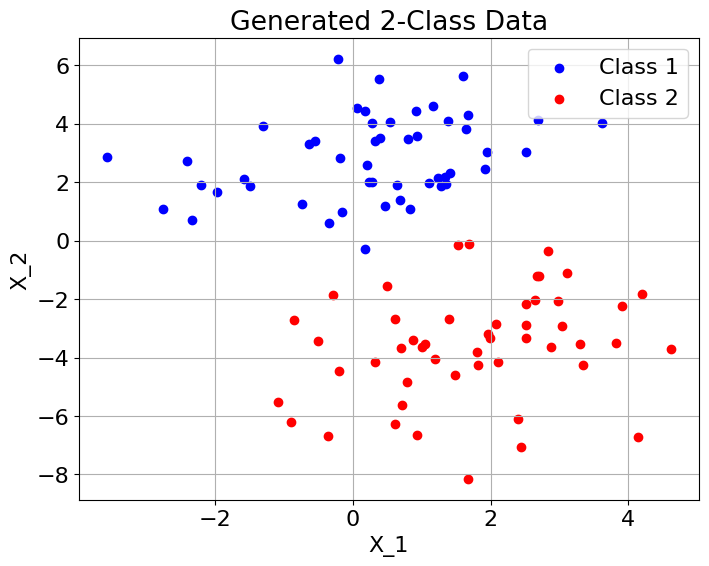

In [31]:
import numpy as np
from sklearn.svm import SVC
from matplotlib import pyplot as plt
from matplotlib import cm
# Part (a)
# Generate 2-class data that are just barely separable
# each class is generated y a normal distribution
np.random.seed(314) # control the seed for reproducibility
n_samples = np.array([50,50]) # generate 50 samples per class
c1_mean = np.array([0.2,2.8]).T # mean vector of class 1
c2_mean = np.array([2,-3]).T # mean vector of class 2
c1_cov = np.array([[3,1],[1,2]]) # covariance matrix of class 1
c2_cov = np.array([[2,1],[1,3]]) # covariance matrix of class 2
c1_samples = np.random.multivariate_normal(c1_mean, c1_cov, n_samples[0])
c2_samples = np.random.multivariate_normal(c2_mean, c2_cov, n_samples[1])
X = np.vstack((c1_samples, c2_samples)) # data matrix
y = np.hstack((np.ones(n_samples[0]), -1*np.ones(n_samples[1]))) # class labels

# scatter plot of the data
# set font size
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(8,6))
plt.scatter(c1_samples[:,0], c1_samples[:,1], marker='o', color='b', label='Class 1')
plt.scatter(c2_samples[:,0], c2_samples[:,1], marker='o', color='r', label='Class 2')
plt.title('Generated 2-Class Data')
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.legend()
plt.grid()
plt.show()

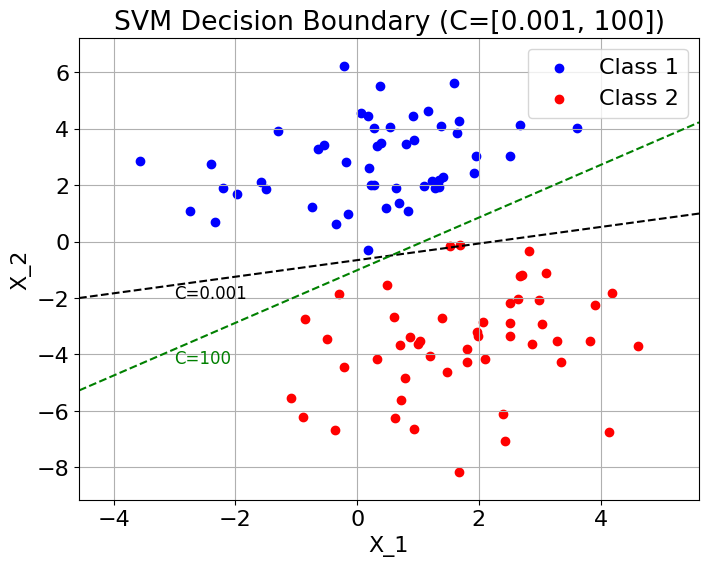

In [32]:

# Test with a SVM classifier
C = [0.001, 100]
svm_classifier = []  # list to hold SVM classifiers
for c in C:
    svm = SVC(kernel='linear', C=c)
    svm.fit(X, y)
    svm_classifier.append(svm)

# plot the data and decision boundary
plt.figure(figsize=(8,6))
plt.scatter(c1_samples[:,0], c1_samples[:,1], marker='o', color='b', label='Class 1')
plt.scatter(c2_samples[:,0], c2_samples[:,1], marker='o', color='r', label='Class 2')

# create a grid to plot decision boundary
# as decision boundary is a function of two variables, we need to create a mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500)) # grid points for plotting
Z1 = svm_classifier[0].decision_function(np.c_[xx.ravel(), yy.ravel()]) # decision_function performs
Z1 = Z1.reshape(xx.shape)
Z2 = svm_classifier[1].decision_function(np.c_[xx.ravel(), yy.ravel()]) # decision_function performs
Z2 = Z2.reshape(xx.shape)
# plot decision boundary and margins
plt.contour(xx, yy, Z1, levels=[0], colors='k', linestyles='--')
plt.contour(xx, yy, Z2, levels=[0], colors='g', linestyles='--')
# add label for the decision boundaries
plt.text(-3, -2, 'C=0.001', color='k', fontsize=12)
plt.text(-3, -4.3, 'C=100', color='g', fontsize=12)
plt.title(f'SVM Decision Boundary (C={C})')
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.legend()
plt.grid()
plt.show()

## Part (b) - Cross-validation for different C values

In [33]:
from sklearn.model_selection import cross_val_score

def calculate_missclassified_observations(svm_classifier,X,y):
    """
    This function calculates the number of misclassified observations
    
    """
    y_pred = svm_classifier.predict(X) # perform prediction on the input data
    missclassified = np.sum(y_pred != y) # count misclassified observations
    return missclassified

# Define a range of C values to test
# C must be strictly positive
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Store cross-validation error rates
cv_errors = []
cv_std = []
no_missclassified = []
# Perform 5-fold cross-validation for each C value
for C in C_values:
    # Create SVM classifier with linear kernel
    svm_classifier = SVC(kernel='linear', C=C)
    
    # Compute cross-validation scores (accuracy)
    # use scoreing = 'accuracy' as this is a classification problem
    cv_scores = cross_val_score(svm_classifier, X, y, cv=5, scoring='accuracy')
    
    # Convert accuracy to error rate
    cv_error = 1 - cv_scores.mean() # take the mean value of the 5 folds
    cv_errors.append(cv_error)
    
    print(f'C = {C}: CV Error = {cv_error:.4f} ')

C = 0.001: CV Error = 0.0200 
C = 0.01: CV Error = 0.0100 
C = 0.1: CV Error = 0.0100 
C = 1: CV Error = 0.0100 
C = 10: CV Error = 0.0100 
C = 100: CV Error = 0.0100 
C = 1000: CV Error = 0.0100 


In [34]:
# Check the number of misclassified observations for each C
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
no_missclassified = []
svm_classifier = []
for C in C_values:
    svm = SVC(kernel='linear', C=C)
    svm.fit(X, y)
    missclassified = calculate_missclassified_observations(svm, X, y)
    no_missclassified.append(missclassified)
    svm_classifier.append(svm)
    print(f'C = {C}: No. of misclassified observations = {missclassified}')

C = 0.001: No. of misclassified observations = 2
C = 0.01: No. of misclassified observations = 2
C = 0.1: No. of misclassified observations = 0
C = 1: No. of misclassified observations = 0
C = 10: No. of misclassified observations = 0
C = 100: No. of misclassified observations = 0
C = 1000: No. of misclassified observations = 0


# Part (c)

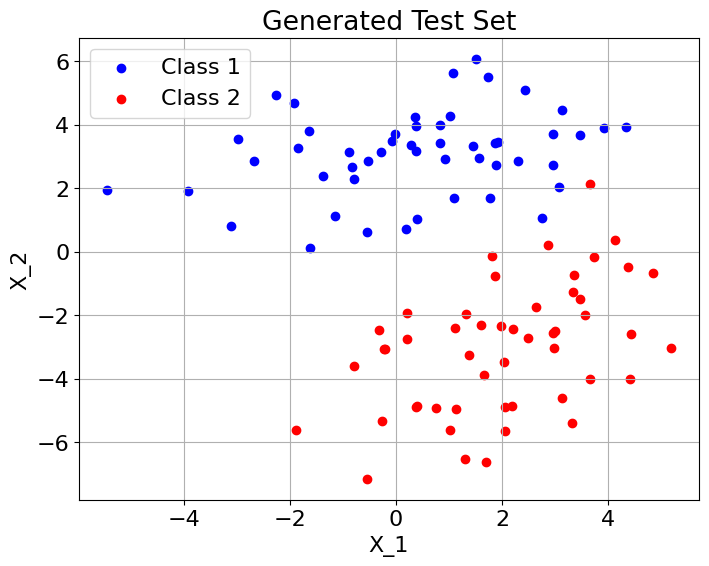

In [43]:
np.random.seed(159) # for reproducibility
# Generate a test set
# similar to part (a)
n_samples_test = np.array([50,50]) # generate 100 samples per class
c1_test_mean = np.array([0.2,2.8]).T # mean vector of class 1
c2_test_mean = np.array([2,-3]).T # mean vector of class 2
c1_test_cov = np.array([[3,1],[1,2]]) # covariance matrix of class 1
c2_test_cov = np.array([[2,1],[1,3]]) # covariance matrix of class 2
c1_test_samples = np.random.multivariate_normal(c1_test_mean, c1_test_cov, n_samples_test[0])
c2_test_samples = np.random.multivariate_normal(c2_test_mean, c2_test_cov, n_samples_test[1])
X_test = np.vstack((c1_test_samples, c2_test_samples)) # data matrix
y_test = np.hstack((np.ones(n_samples_test[0]), -1*np.ones(n_samples_test[1]))) # class labels

# scatter plot of the data
# set font size
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(8,6))
plt.scatter(c1_test_samples[:,0], c1_test_samples[:,1], marker='o', color='b', label='Class 1')
plt.scatter(c2_test_samples[:,0], c2_test_samples[:,1], marker='o', color='r', label='Class 2')
plt.title('Generated Test Set')
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.legend()
plt.grid()
plt.show()


In [46]:
# We use the svm_classifier list trained earlier to evaluate on the test set
test_errors = []
for idx, classifier in enumerate(svm_classifier):
    y_pred_test = classifier.predict(X_test)
    test_error = np.mean(y_pred_test != y_test) # calculate test error rate
    test_errors.append(test_error)
    print(f'C = {C_values[idx]}: Test Error Rate = {test_error:.4f}')

C = 0.001: Test Error Rate = 0.0200
C = 0.01: Test Error Rate = 0.0100
C = 0.1: Test Error Rate = 0.0100
C = 1: Test Error Rate = 0.0200
C = 10: Test Error Rate = 0.0100
C = 100: Test Error Rate = 0.0100
C = 1000: Test Error Rate = 0.0100


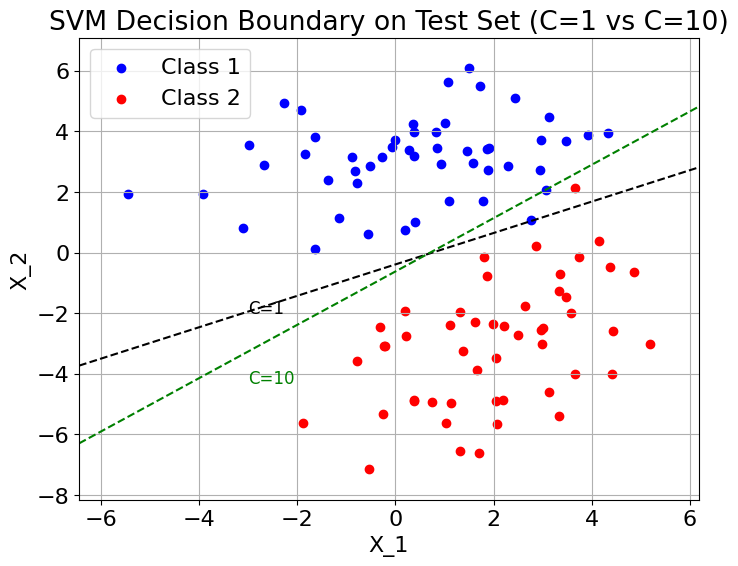

In [ ]:
# we see that for C = 0.1, the test error is smaller that for C = 1
# plot the data and decision boundary
plt.figure(figsize=(8,6))
plt.scatter(c1_test_samples[:,0], c1_test_samples[:,1], marker='o', color='b', label='Class 1')
plt.scatter(c2_test_samples[:,0], c2_test_samples[:,1], marker='o', color='r', label='Class 2')
# create a grid to plot decision boundary
# as decision boundary is a function of two variables, we need to create a mesh grid
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500)) # grid points for plotting
Z1 = svm_classifier[2].decision_function(np.c_[xx.ravel(), yy.ravel()]) # decision_function performs
Z1 = Z1.reshape(xx.shape)
Z2 = svm_classifier[3].decision_function(np.c_[xx.ravel(), yy.ravel()]) # decision_function performs
Z2 = Z2.reshape(xx.shape)
# plot decision boundary and margins
plt.contour(xx, yy, Z1, levels=[0], colors='k', linestyles='--')
plt.contour(xx, yy, Z2, levels=[0], colors='g', linestyles='--')
# add label for the decision boundaries
plt.text(-3, -1, 'C=0.1', color='k', fontsize=12)
plt.text(-3, -4.2, 'C=1', color='g', fontsize=12)
plt.title(f'SVM Decision Boundary on Test Set (C=0.1 vs C=1)')
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.legend()
plt.grid()
plt.show()